In [1]:
import os
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_in = os.path.join(pth, 'data', 'modeling', 'landscape')
pth_out = os.path.join(pth, 'figures', 'CCCA')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_in, 'CCCA.h5ad'))
src = adata[adata.obs.landscape == 'True'].obs.source.unique()
adata = adata[adata.obs.source.isin(src)].copy(); adata

AnnData object with n_obs × n_vars = 41492 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores'

In [4]:
names_dict = {
    '../../data/unzip/CCCA/Data_Filbin2018_Brain'           : 'Pediatric H3-K27M Mutant Glioma',
    '../../data/unzip/CCCA/Data_Gojo2020_Brain'             : 'Pediatric Ependymoma',
    '../../data/unzip/CCCA/Data_He2021_Prostate'            : 'Metastatic Prostate Cancer',
    '../../data/unzip/CCCA/Data_Hovestadt2019_Brain'        : 'Medulloblastoma',
    '../../data/unzip/CCCA/Data_Jerby-Arnon2018_Skin'       : 'Melanoma',
    '../../data/unzip/CCCA/Data_Karaayvas2018_Breast'       : 'Triple-Negative Breast Cancer',
    '../../data/unzip/CCCA/Data_Maynard2020_Lung'           : 'Metastatic Non-Small Cell Lung Cancer',
    '../../data/unzip/CCCA/Data_Neftel2019_Brain/SmartSeq2' : 'Glioblastoma',
    '../../data/unzip/CCCA/Data_Puram2017_Head-and-Neck'    : 'Head and Neck Squamous Cell Carcinoma',
    '../../data/unzip/CCCA/Data_Tirosh2016_Brain'           : 'IDH-Mutant Oligodendroglioma',
    '../../data/unzip/CCCA/Data_Venteicher2017_Brain'       : 'IDH-Mutant Astrocytoma'}

/tmp/ipykernel_988646/671410913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation = 30,


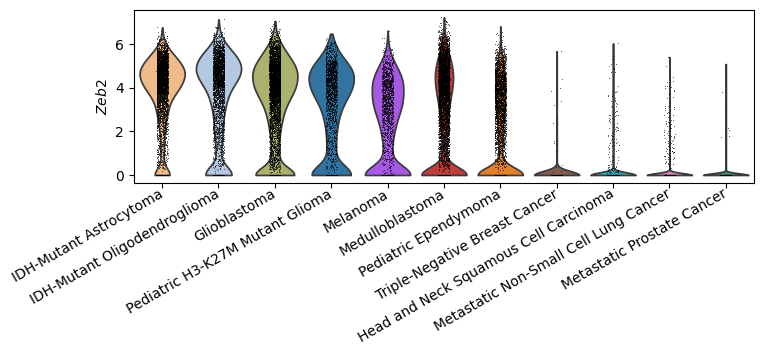

In [9]:
# plot Zeb2 expression
fig, ax = plt.subplots(1, 1, figsize = (8, 2.25))
adata.obs['Zeb2_expr'] = adata[:, 'Zeb2'].X.toarray()
order = (adata.obs.groupby('source', observed = True)
         .Zeb2_expr.mean()
         .sort_values(ascending = False).index)

sc.pl.violin(adata, 'Zeb2', 'source',
             order = order, size = .5,
             ax = ax, show = False)

xticklabels = [names_dict[lbl.get_text()]
               for lbl in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels, rotation = 30,
                   rotation_mode = 'anchor',
                   ha = 'right', va = 'center')

ax.set_xlabel('')
ax.set_ylabel(r'$Zeb2$')
fn = os.path.join(pth_out, 'Zeb2.pdf')
plt.savefig(fn, bbox_inches = 'tight')